Machine learning is assumed to be either supervised or unsupervised but a recent new-comer broke the status-quo - reinforcement learning. Supervised and unsupervised approaches require data to model, not reinforcement learning! That’s right, it can explore space with a handful of instructions, analyze its surroundings one step at a time, and build data as it goes along for modeling.
In this walk-through, we’ll use Q-learning to find the shortest path between two areas. It has the ability to embark on a journey with no knowledge of what to do next. This approach requires constant trial and error as it collects data about its surroundings and figures out how to accomplish its goal. This opens up interesting possibilities, what about recording additional information, like environmental details along the way that it may not fully understand until after it reaches its goal? And once reached, could it review that additional data to determine if any of it would have helped it reach its goal faster? 

In this Tutorial, we try to find the shortest path starting from point zero (0) to point seven (7). To achieve that goal, we train a agent using Reinforcement Learning, using Q-learning algorithm and at the end of the training it will be able to tell us the shortest path starting from 0 to 7.

![alt text](./grph.png "image title")

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

# map cell to cell, add circular cell to goal point

In [2]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

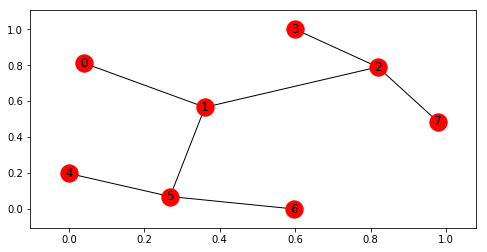

In [24]:
# We create a points-list map that represents each direction our bot can take. 
# Using this format allows us to easily create complex graphs but also easily 
# visualize everything with networkx graphs.

#Our starting point is 0, our goal point is 7.

goal = 7
plt.figure(figsize=(8,4))
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.savefig('grph.png')
plt.show()

In [4]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [5]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [6]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
# add goal point round trip
R[goal,goal]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [7]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [8]:
# Here we initialize our Q-learning Matrix
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

#---------------------------------------------------------------
# Given a particular state we want to know what the available actions that we can do
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#---------------------------------------------------------------
# Given a range of available action we want to sample the next action that we can do
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

#---------------------------------------------------------------

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  #print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

0

In [9]:
# We keep following Mic’s blog and run the training and testing functions 
# that will run the update function 700 times allowing the Q-learning
# model to figure out the most efficient path:

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

Trained Q matrix:
[[  0.          63.98882822   0.           0.           0.
    0.           0.           0.        ]
 [ 51.15364565   0.          79.98603527   0.           0.
   51.19106257   0.           0.        ]
 [  0.          63.98882822   0.          63.98882822   0.
    0.           0.          99.98254409]
 [  0.           0.          79.98603527   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19106257   0.           0.        ]
 [  0.          63.98882822   0.           0.          40.92291652
    0.          40.92291652   0.        ]
 [  0.           0.           0.           0.           0.
   51.19106257   0.           0.        ]
 [  0.           0.          79.92757132   0.           0.
    0.           0.         100.        ]]
Most efficient path:
[0, 1, 2, 7]


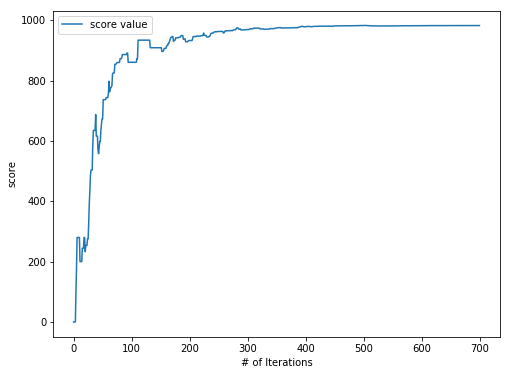

In [10]:
plt.figure(figsize=(8,6))
plt.xlabel('# of Iterations')
plt.ylabel('score') 
plt.plot(scores, label = 'score value')
plt.legend(loc='best')
plt.show()

# Version 2.0, with Environmental Details

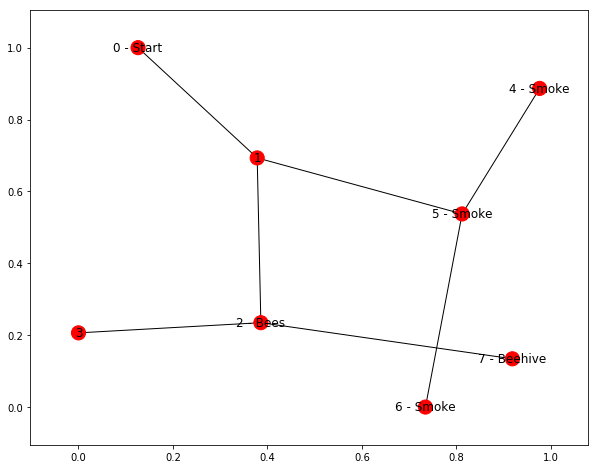

In [11]:
bees = [2]
smoke = [4,5,6]

plt.figure(figsize=(10,8))
G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'0 - Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [12]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  #print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

Bees Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 29.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 78.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 40.  0.  0.  0.  0.  0.]]
Smoke Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 84.  0.  0.]
 [ 0.  0.  0.  0. 31.  0. 40.  0.]
 [ 0.  0.  0.  0.  0. 88.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    #print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [1 4 6]
to: [1]
going from: [0 2 5]
to: [0 2]
going from: [0 2 5]
to: [0 2]
going from

/usr/lib/python3/dist-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in true_divide


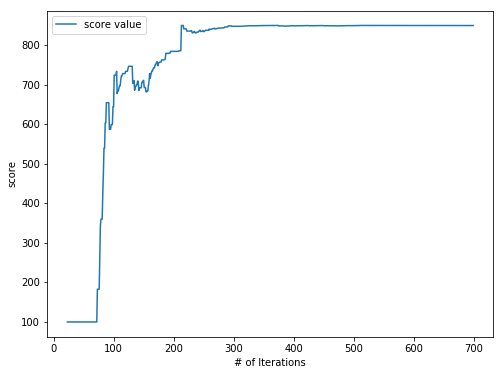

In [14]:
plt.figure(figsize=(8,6))
plt.xlabel('# of Iterations')
plt.ylabel('score') 
plt.plot(scores, label = 'score value')
plt.legend(loc='best')
plt.show()